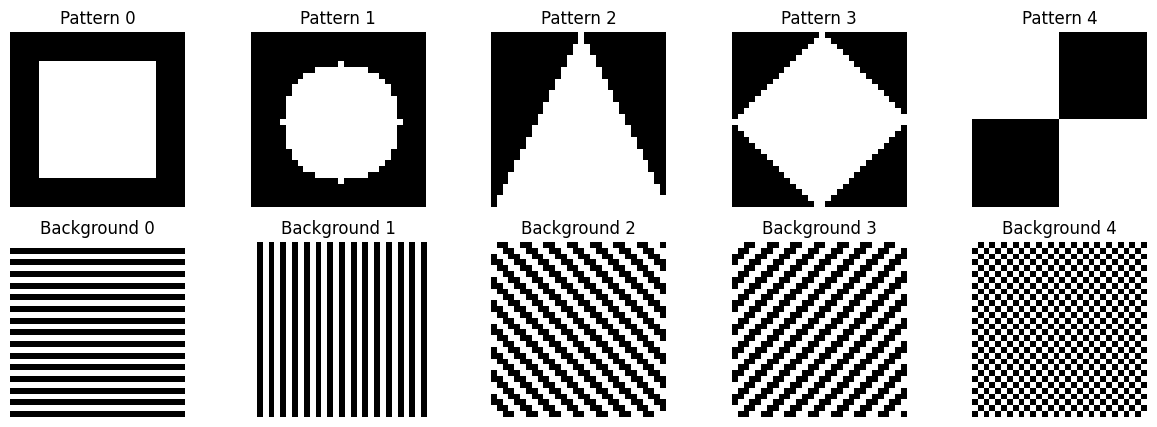

In [35]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 生成正方形图案
def generate_square(size):
    pattern = torch.zeros((3, size, size))
    pattern[:, 5:25, 5:25] = 1
    return pattern

# 生成圆形图案
def generate_circle(size):
    pattern = torch.zeros((3, size, size))
    y, x = np.ogrid[:size, :size]
    mask = (x - size // 2) ** 2 + (y - size // 2) ** 2 <= (size // 3) ** 2
    pattern[:, mask] = 1
    return pattern

# 生成等腰三角形图案
def generate_triangle(size):
    pattern = torch.zeros((3, size, size))
    height = size
    base = size
    center = size // 2

    for i in range(height):
        for j in range(center - i // 2, center + i // 2 + 1):
            if j >= 0 and j < size:
                pattern[:, i, j] = 1
    return pattern

# 生成由四个直角三角形组成的菱形图案
def generate_diamond(size):
    pattern = torch.zeros((3, size, size))
    center = size // 2

    # 左上角三角形
    for i in range(center):
        for j in range(center - i, center):
            pattern[:, i, j] = 1

    # 右上角三角形
    for i in range(center):
        for j in range(center, center + i + 1):
            pattern[:, i, j] = 1

    for i in range(center, size):
        for j in range(center, center + (size - i)):
            pattern[:, i, j] = 1

    for i in range(center, size):
        for j in range(center - (size - i), center):
            pattern[:, i, j] = 1

    return pattern

def generate_boxes(size):
    center = size // 2

    pattern = torch.zeros((3, size, size))
    pattern[:, :center, :center] = 1
    pattern[:, center:, center:] = 1
    return pattern

# 生成横条纹背景
def generate_horizontal_stripes(size):
    background = torch.zeros((3, size, size))
    background[:, ::2, :] = 1
    return background

# 生成竖条纹背景
def generate_vertical_stripes(size):
    background = torch.zeros((3, size, size))
    background[:, :, ::2] = 1
    return background

# 生成左斜条纹背景
def generate_left_slanting_stripes(size, stripe_width=2):
    background = torch.zeros((3, size, size))
    for i in range(size):
        for j in range(size):
            if ((i - j) // stripe_width) % 2 == 0:
                background[:, i, j] = 1
    return background

# 生成右斜条纹背景
def generate_right_slanting_stripes(size, stripe_width=2):
    background = torch.zeros((3, size, size))
    for i in range(size):
        for j in range(size):
            if ((i + j) // stripe_width) % 2 == 0:
                background[:, i, j] = 1
    return background

# 生成棋盘背景
def generate_chessboard(size):
    background = torch.zeros((3, size, size))
    background[:, ::2, ::2] = 1
    background[:, 1::2, 1::2] = 1
    return background

# 生成图案和背景
size = 30
patterns = [generate_square(size), generate_circle(size), generate_triangle(size), generate_diamond(size), generate_boxes(size)]
backgrounds = [generate_horizontal_stripes(size), generate_vertical_stripes(size), generate_left_slanting_stripes(size), generate_right_slanting_stripes(size), generate_chessboard(size)]

# 存储张量
for i, pattern in enumerate(patterns):
    torch.save(pattern, f'combine/pattern_{i}.pt')

for i, background in enumerate(backgrounds):
    torch.save(background, f'combine/background_{i}.pt')

# 可视化
fig, axs = plt.subplots(2, 5, figsize=(15, 5))
for i, pattern in enumerate(patterns):
    axs[0, i].imshow(pattern.permute(1, 2, 0).numpy())
    axs[0, i].set_title(f'Pattern {i}')
    axs[0, i].axis('off')

for i, background in enumerate(backgrounds):
    axs[1, i].imshow(background.permute(1, 2, 0).numpy())
    axs[1, i].set_title(f'Background {i}')
    axs[1, i].axis('off')

plt.show()